# Observations of the heat budget of coastal Arctic sea ice under the influence of a river outflow

Master analysis notebook for this Ikaagvik Sikukuun paper.

In [193]:
import numpy as np
import pandas as pd
import xarray as xr
import dask.array as da
import cartopy.crs as ccrs
import cartopy
#from cartopy.io.shapereader import Reader
#from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
#import geopy.distance
import gsw
import warnings

#from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.patches as patches
#import colorcet as cc
%matplotlib inline
#plt.rcParams['figure.figsize'] = (16,12)
import tqdm

#from osgeo import gdal, osr
#gdal.UseExceptions()

#from windrose import WindroseAxes

#from subprocess import Popen
#import subprocess as sp

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Figure 1: Layered Sea Ice Cover Map

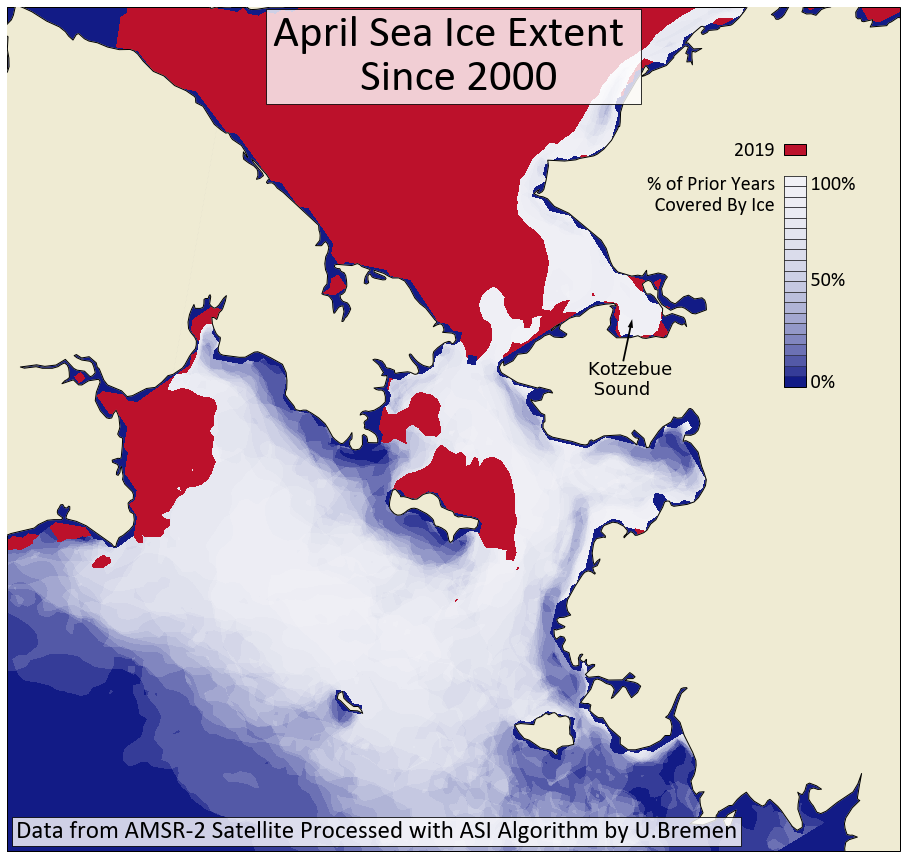

In [194]:
#open datasets of sea ice cover in Bering Strait region for 2000-2018 and 2019 (see Appendix 1 for how I got these datasets)
si = xr.open_dataset('../../Data/Satellite/Sea Ice/ASI_SSMI/si_2000_2018.nc')
si19 = xr.open_dataset('../../Data/Satellite/Sea Ice/ASI_SSMI/si_2019.nc')

#generate map of transparent sea ice cover + 2019 overlaid in red
from Satellite_SeaIce_Toolbox import plot_layered_ice_map
plot_layered_ice_map(si = si, 
                     si19 = si19, 
                     startDay = 91,       #first yearday of April 
                     endDay = 120,        #last yearday of April 
                     thresh = 70,         #minimum sea ice cover threshold to plot as "covered"
                     transparency = 0.15, #transparency of each layer. 0.15 will make a 100% value be about 96% opaque
                     plotflag = 0)        #set to 1 if you want to save figures for every year as it is added

#plt.savefig('Figures/Layered Sea Ice Maps/AprSeaIceExtent_to_2019.png',dpi=300,facecolor='k')

*Figure 1: Sea ice cover (>70%) in the Chukchi and Bering Seas for every April going back to April of 2000. Each year is plotted as a transparent white layer, building up a climatology over which 2019 April sea ice cover is shown in red.*

## Figure 2: Sea Ice and SST Monthly Anomalies

*Figure 2: Recent years have seen growing negative anomalies in sea ice cover in the Chukchi and Bering seas, particularly in the marginal months of December, April, and May (top), accompanied by positive summer SST anomalies (bottom). Data from Hamburg ICDC SSMI product (Sea Ice) and Nasa OISST Reynolds interpolated product (SST), spanning the geographical region depicted in Figure 1.*

## Figure 3: Layered Landfast Ice Extent Map
(made by hand-tracing MODIS images in QGIS)

![](./Figures/Landfast Ice minima v2.png)

*Figure 3: Landfast Ice Climatology back to 2000 plotted following the same scheme as Figure 1. The Kobuk and Noatak rivers enter the sound via the bathymetric channel shown in grey. Also shown is the Alaska Coastal Current, which brings warm water northward through the Bering Strait during the summer months.*

## Figure 4: Measurement Stations in Kotzebue Sound
(made in QGIS and Powerpoint)

![](./Figures/MeasurementLocations v4.png)

*Figure 4: Locations of the Sea Ice Station (SIS) and Ocean Bottom Tripod (OBT) measurement stations in Kotzebue Sound, with their dates of deployment and recovery. *

## Figure 5: SIS Schematic
(made in Powerpoint)

![](./Figures/SIS schematic v4.png)

*Figure 5: The Sea Ice Station featured measurements of net radiative fluxes, air temperature, humidity, pressure, wind speed, and solar insolation above the ice. Below the ice, moorings measured water temperature, salinity, and current profiles (see Table 1 for deployment depths). Measurements of snow and ice thickness were made by local observers on a weekly basis using calibrated stakes.*

## Figure 6: Overview of SIS Measurements

*Figure 6: Summary of all measurements made on the SIS: bi-directional water currents; water temperatures & salinity; wind speed & direction; ice & snow thickness; air temperature, humidity, and pressure; net LW and SW radiation; and down-welling SW radiation. Also shown are down-welling LW and SW radiation measurements from a tower above the Fish & Wildlife Service (FWS) building in the town of Kotzebue. Daily albedo values are shown in the bottom panel, calculated by differencing the CNR2 net radiometer from the down-welling SW sensor on the MaxiMet.*

## Figure 7: Bi-directional current correlations

*Figure 7: (Left) Directional histogram of currents measured at the Sea Ice Station, showing highly bi-modal behavior. (Right) Lag correlations between 1-dimensional (bi-directional) current parameter and both water temperature & salinity.*

## Figure 8: Timeseries of $u_{*0}$ and $\Delta T$

*Figure 8: Timeseries of friction velocity $u_{*0}$ and departure from freezing $ΔT$, the two terms affecting variations in the magnitude of the ocean-ice heat flux.* 

## Figure 9: $St*$ vs $Re*$ for existing data sets compared to our data set

*Figure 9: Stanton number has displayed no dependence on roughness Reynolds number for existing in-situ data sets of under-ice heat flux measurements, however this study suggests that the dependence anticipated from laboratory studies may emerge at sufficiently large roughness Reynolds numbers.*

## Figure 10: Flux balances at both interfaces

*Figure 10: Flux balances at the top and bottom interfaces of the snow/ice layer. The conductive flux away from the bottom interface balances the total flux away from the top interface, and differences between the water-ice heat flux and the conductive flux should lead to ice growth or melt.*

## Figure 11: Relationship Between Salinity & Departure From Freezing Point

*Figure 11: Sudden increases in salinity correspond to departures of water temperature from the freezing point, implying an oceanic origin for residual heat in the water under the ice. The slope of the excursions in ΔT-Salinity space is very consistent, suggesting a characteristic relationship between salinity excursions & heat content.*

## Figure 12: Temperature and Salinity at OBT - Spring and Fall

*Figure 12: At the mouth of Kotzebue Sound, temperature and salinity are positively correlated in the Fall (a), but negatively correlated in the Spring (b) for both years of measurements. *

## Figure 13: T-S Diagram of fall vs. spring at OBT

*Figure 13: Temperature-Salinity diagram from the 2018/19 year, showing the perpendicularity between salinity-reduction events in fall and spring. The climatological salinity ranges measured in the Bering Strait suggest that pulses of significantly fresher water reflect the influence of Kotzebue Sound river outflow. We posit that the river acts as a heat sink to the sound in the fall/winter, and a heat source in the spring/summer.*

# Appendix 1: Satellite Importing and Subsetting

These codes pull data from externally hosted OpenDAP servers, so they can take a long time to execute and they will only work insofar as those servers are still hosted in the same manner. I've left the cell as raw text rather than code to avoid accidentally executing it, but they show how the data got to where it is in the main analysis.